In [1]:
import os
import gzip
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.io
from anndata import AnnData
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sc.settings.set_figure_params(dpi=100)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
%load_ext rpy2.ipython
import harmonypy as hm


In [2]:
adata = sc.read_h5ad('/nfs/lab/jnewsome/pbmc/pbmc_rna/pbmc.scRNA.norm.RankGenePrepAnno.v2.h5ad')

In [3]:
metadata = adata.obs

In [7]:
sc.pp.neighbors(adata, n_neighbors=30, method='umap', metric='cosine', random_state=0, n_pcs=50)
sc.tl.leiden(adata, resolution=0.1, random_state=0)
sc.tl.umap(adata, min_dist=0.3, random_state=0)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:01)


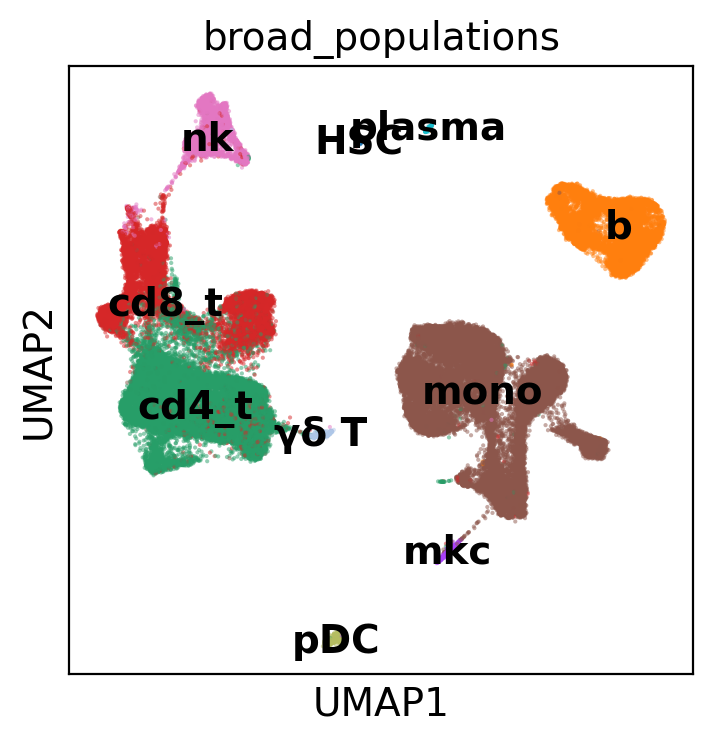

In [8]:
sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color=['broad_populations'], size=9, alpha=.5, legend_loc='on data')


In [15]:
%%R -i metadata -o replaceCelltype
metadata$newname = as.character(metadata$broad_populations)
metadata$newname[metadata$newname %in% c("cd8_t", 'cd4_t')] <- as.character('Tcells')
replaceCelltype  = metadata$newname

In [16]:
adata.obs['celltype'] = replaceCelltype

In [19]:
sc.tl.rank_genes_groups(adata, 'celltype', method='wilcoxon' , corr_method= 'benjamini-hochberg')

ranking genes


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:03:03)


In [20]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).to_csv("/nfs/lab/projects/pbmc_snATAC/analysis_v2/motifbreak_enrichment/scrna_gene_ranks/clusters_rank_genes_names.txt", sep="\t")
pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj']).to_csv("/nfs/lab/projects/pbmc_snATAC/analysis_v2/motifbreak_enrichment/scrna_gene_ranks/clusters_rank_genes_pvals_adj.txt", sep="\t")
pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges']).to_csv("/nfs/lab/projects/pbmc_snATAC/analysis_v2/motifbreak_enrichment/scrna_gene_ranks/clusters_rank_genes_logfoldchanges.txt", sep="\t")
pd.DataFrame(adata.uns['rank_genes_groups']['pvals']).to_csv("/nfs/lab/projects/pbmc_snATAC/analysis_v2/motifbreak_enrichment/scrna_gene_ranks/clusters_rank_genes_pvals.txt", sep="\t")


In [23]:
pd.crosstab(adata.obs['leiden'],replaceCelltype)

col_0,HSC,Tcells,b,mkc,mono,nk,pDC,plasma,γδ T
leiden,,,,,,,,,
0,1,29393,0,0,43,1,0,0,217
1,0,71,14,3,22249,2,0,0,0
2,0,7705,0,0,26,3737,0,0,5
3,0,1,8852,0,17,0,0,0,0
4,0,22,8,284,43,0,509,0,0
5,0,1,3,0,0,0,0,163,0
6,135,2,0,0,0,0,0,0,1
